In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns
import math

In [2]:
def plot_hitmap(x,y,time,path="",title=""):
        
    plt.rc('font',size=14)
    plt.figure(figsize=(7,6))
    plt.set_cmap('jet')  
    
    
    # x=[math.log(x) for x in np.array(x)]
    # y=[math.log(x) for x in np.array(y)] 
    
    x=np.array(x)
    y=np.array(y)    
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    r=np.corrcoef(x,y)
    
    # Create the main plot
    _, ax1 = plt.subplots()


    cb=ax1.scatter(x, y, c=z, s=10,alpha=0.8)  
    ax1.plot(x,x,ls='-.',c='k',linewidth=1,alpha=0.5,label=f"n={len(list(x))}\nr={int(1000*r[0][1])/1000}")      
    cbar = plt.colorbar(cb)
    ax1.set_ylabel("k (Single time point)")
    ax1.set_xlabel("k (Time course data)")    
    ax1.legend()  
    # Remove top and right spines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_xlim([0,min(max(x),0.3)])
    ax1.set_ylim([0,min(max(y),0.3)])
    
    
    # Create the second x-axis
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks([(i*time) for i in ax1.get_xticks()])
    ax2.set_xlabel('kt', color='k')
    ax2.spines['right'].set_visible(False)


    # Adjust layout to prevent labels from overlapping
    plt.tight_layout()
    if len(path)>0:
        plt.savefig(f"{path}/{title}.jpeg",dpi=900)
        
    plt.show()

In [51]:
def plotRateRDDensity(rd_k,path="",title=""):
    plt.rc('font',size=14)
    plt.figure(figsize=(8,6))
    # rd_k= (res.d2ome_k - res.new_k)/res.d2ome_k
    ax=sns.histplot(rd_k, kde=True, #bins=50,
                label=f"n={len(rd_k)},μ = {int(100*np.mean(rd_k))/100}, \nmedian = {int(100*np.median(rd_k))/100}, \nsd = {int(100*np.std(rd_k))/100}",
                color='white',alpha=0.1,edgecolor=('black',0.75) )
    ax.lines[0].set_color('k')
    ax.lines[0].set_alpha(0.75) 
    ax.lines[0].set_ls(':') 
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel(r'$\frac{ k _{\:Time\: course\: data} - k _{\:Single\: time\: point}}{k _{\:Time\: course\: data}}$')
    plt.legend()
    plt.tight_layout()
    # if len(path)>0:
    #     plt.savefig(f"{path}/{title}_RD_k.jpeg",dpi=900)
    plt.xlim([-1,1])
    # plt.show()

In [17]:
def getpath(organ,_time,_rsquared,_numberofterms):
    path= f"../RateComparision4/Figures/{organ}/Day_{_time}/r2_{_rsquared}/numberofterms_{_numberofterms}/" 
    title=f"{organ}_day_{_time}_numberofterms_{_numberofterms}.csv"   
    return path+title

In [57]:
pw,ph=0.046,1.5574E-4
organ="liver"
time=2
rsquared=0.9

data=pd.read_csv(getpath(organ,time,rsquared,1))
data=data[data.d2ome_k<0.3/time]
data['l_approx']= 1 - ( (data.i0_t_exp/data.I0_0_exp)  ** (1/data.NEH))
data['r_approx']=  (data.new_k/data.NEH)*( 1 - (pw/(1-ph)))
data['kdiff']=abs(data.d2ome_k - data.new_k)/data.d2ome_k 
data=data.sort_values(by='kdiff')
data.to_csv("temp_data.csv",index=False)
data.head()

,Protein,Peptide,Charge,NEH,M0,I0_0_exp,I0_asmp,i0_t_exp,i0_t_theo,d2ome_k,new_k,l_approx,r_approx,kdiff
8276,THIL_MOUSE,ASIcNGGGGASALLIEK,2,36,0.39967,0.395231,0.073337,0.327041,0.338133,0.10448,0.104478,0.005247,0.002769,0.000018
6039,ODBB_MOUSE,SGDLFNcGSLTIR,2,20,0.43960,0.440610,0.171380,0.367902,0.375917,0.13553,0.135539,0.008977,0.006465,0.000063
5862,NDUS2_MOUSE,ILNHIMAVTTH,2,16,0.46188,0.496722,0.217396,0.463847,0.431129,0.06721,0.067232,0.004271,0.004009,0.000328
5320,M2GD_MOUSE,LTSEDLSDDAFK,2,21,0.47055,0.495202,0.175006,0.410352,0.396833,0.14346,0.143548,0.008910,0.006521,0.000614
6123,OTC_MOUSE,LQAFQGYQVTMK,2,21,0.41434,0.436097,0.154101,0.367488,0.354066,0.13173,0.131820,0.008118,0.005988,0.000685


Text(0.5, 31.722222222222207, 'Relative difference between the \nleft and right hand side of the equation')

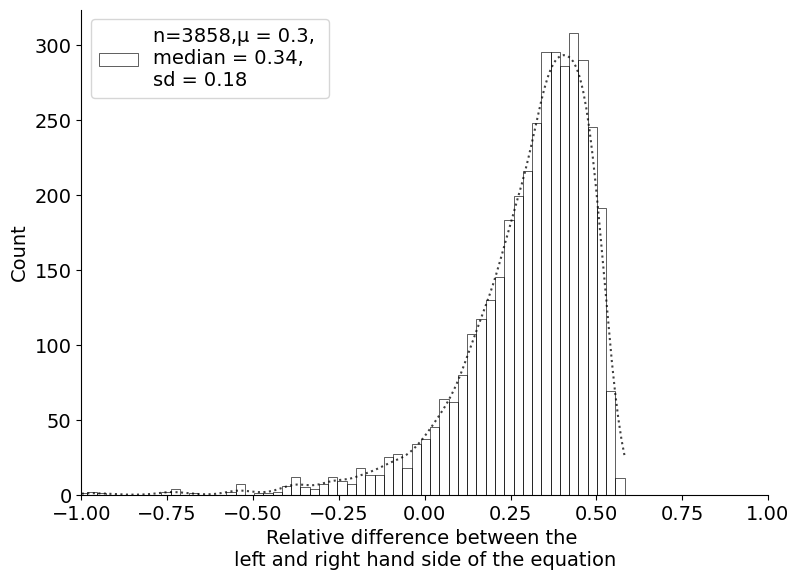

In [58]:
plotRateRDDensity((data.l_approx - data.r_approx)/data.l_approx )
plt.xlabel("Relative difference between the \nleft and right hand side of the equation")

<Figure size 700x600 with 0 Axes>

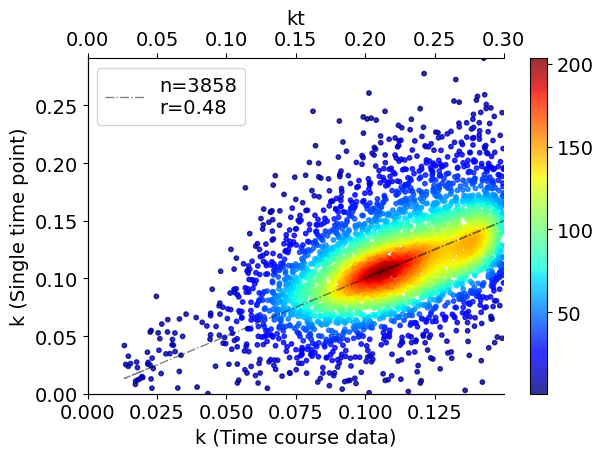

In [59]:
plot_hitmap(data.d2ome_k,data.new_k,time)
# plt.scatter( data.I0_0_exp -  data.i0_t_theo,data.I0_0_exp - data.i0_t_exp,c='k',alpha=0.4)
# plt.plot( data.I0_0_exp -  data.i0_t_theo,data.I0_0_exp -  data.i0_t_theo,c='r',alpha=0.99)


Text(0, 0.5, 'right hand equation')

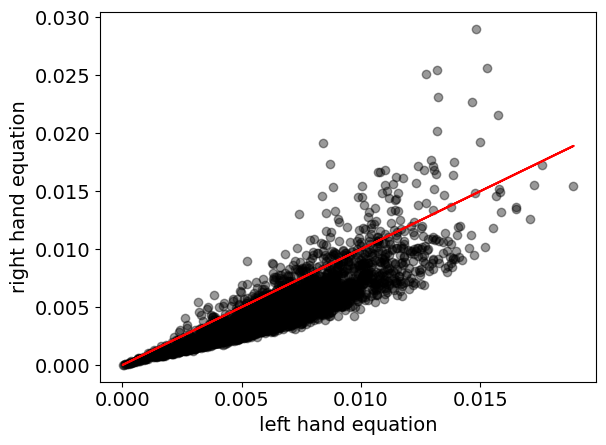

In [60]:
plt.scatter(data.l_approx , data.r_approx,c='k',alpha=0.4)
plt.plot(data.l_approx , data.l_approx,c='r')
plt.xlabel("left hand equation")
plt.ylabel("right hand equation")

In [61]:
# plt.scatter(data.l_approx , data.r_approx,c='k',alpha=0.4)
# plt.plot(data.l_approx , data.l_approx,c='r')

Text(0.5, 0, 'Relative difference of rates')

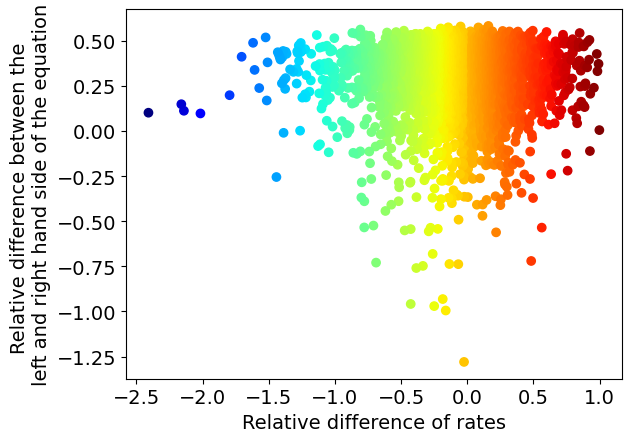

In [62]:
# plt.set_cmap('brg')
plt.scatter((data.d2ome_k - data.new_k)/data.d2ome_k,
            (data.l_approx - data.r_approx)/data.l_approx, 
            c=(data.d2ome_k - data.new_k)/data.d2ome_k )

plt.ylabel("Relative difference between the \nleft and right hand side of the equation")
plt.xlabel("Relative difference of rates")

In [7]:
organ="heart"
src=pd.read_csv(getpath(organ,1,0.9,1))
dst=pd.read_csv(getpath(organ,6,0.9,1))

In [8]:
merged=pd.merge(src,dst,on=['Protein','Peptide','Charge','d2ome_k','NEH','M0','I0_0_exp','I0_asmp'],suffixes=['_src','_dst'])
# merged=merged[['d2ome_k','new_k_src','new_k_dst']]
merged=merged.sort_values(by='d2ome_k')
merged=merged.reset_index(drop=True)

In [9]:
merged['src_dif']=abs(merged.d2ome_k - merged.new_k_src)/merged.d2ome_k 
merged['dst_dif']=abs(merged.d2ome_k - merged.new_k_dst)/merged.d2ome_k 

In [10]:
# plt.scatter(merged.d2ome_k,(merged.new_k_dst - merged.new_k_src))

In [11]:
merged.head(3)

,Protein,Peptide,Charge,NEH,M0,I0_0_exp,I0_asmp,i0_t_exp_src,i0_t_theo_src,d2ome_k,new_k_src,i0_t_exp_dst,i0_t_theo_dst,new_k_dst,src_dif,dst_dif
0,H4_MOUSE,TVTAMDVVYALK,2,14,0.44298,0.450315,0.229095,0.439648,0.440848,0.01002,0.049872,0.435281,0.430500,0.011715,3.977292,0.169162
1,LONM_MOUSE,VLEFIAVSQLR,2,21,0.46488,0.478364,0.172897,0.466404,0.461322,0.01226,0.040962,0.448075,0.444173,0.017289,2.341087,0.410222
2,DLDH_MOUSE,VLGAHILGPGAGEMVNEAALALEYGAScEDIAR,3,78,0.14118,0.149011,0.003583,0.135281,0.139357,0.01334,0.099781,0.130575,0.130596,0.022331,6.479870,0.673972


<Figure size 700x600 with 0 Axes>

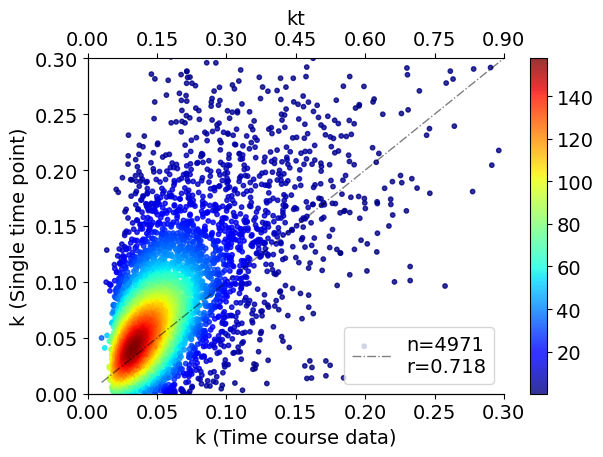

<Figure size 700x600 with 0 Axes>

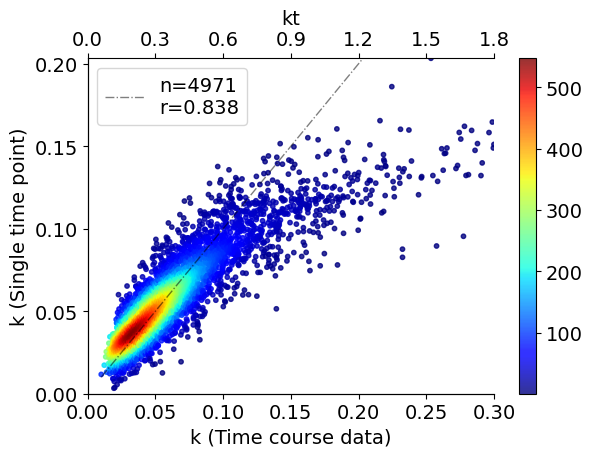

In [12]:
plot_hitmap(merged.d2ome_k,merged.new_k_src,3)
plot_hitmap(merged.d2ome_k,merged.new_k_dst,6)

In [13]:
merged=merged[merged.dst_dif < merged.src_dif]
# merged=merged[(merged.src_dif<0.1)& (merged.dst_dif < 0.1)]
# merged=merged[(merged.d2ome_k<0.05)]
# merged

<Figure size 700x600 with 0 Axes>

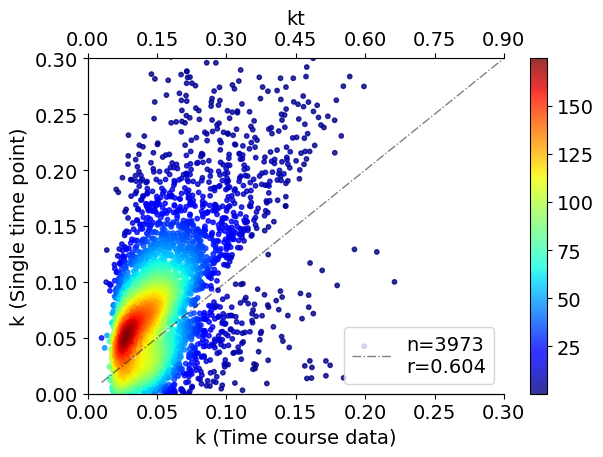

<Figure size 700x600 with 0 Axes>

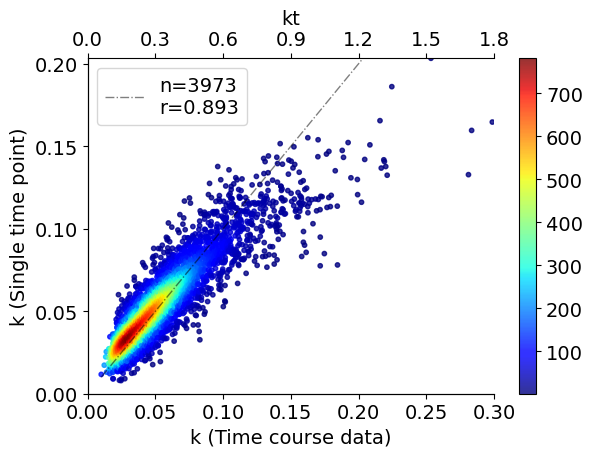

In [14]:
# plt.scatter(merged.d2ome_k,(merged.new_k_dst - merged.new_k_src))
plot_hitmap(merged.d2ome_k,merged.new_k_src,3)
plot_hitmap(merged.d2ome_k,merged.new_k_dst,6)

In [15]:
merged=merged[merged.d2ome_k<0.05]

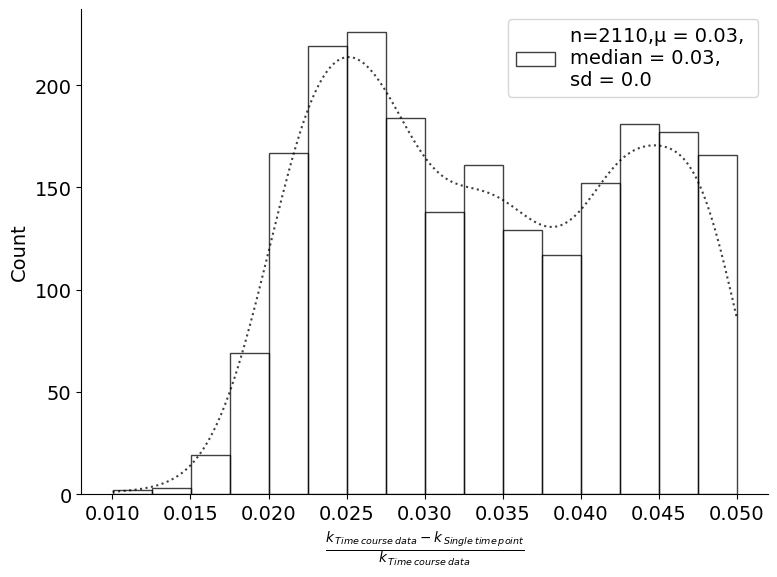

In [16]:
# plt.hist(merged.d2ome_k)
plotRateRDDensity(merged.d2ome_k)

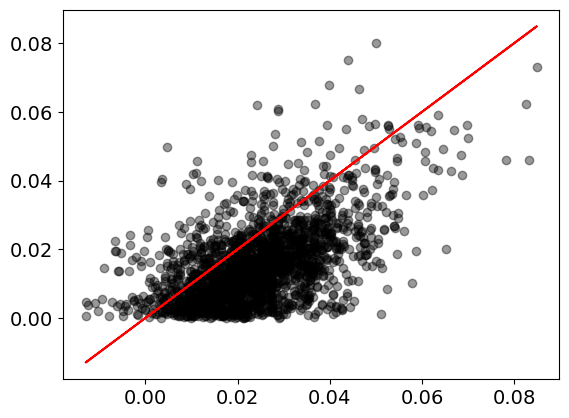

In [17]:
plt.scatter( merged.I0_0_exp -  merged.i0_t_theo_src,merged.I0_0_exp - merged.i0_t_exp_src,c='k',alpha=0.4)
plt.plot(merged.I0_0_exp - merged.i0_t_theo_src,merged.I0_0_exp - merged.i0_t_theo_src,c='r')

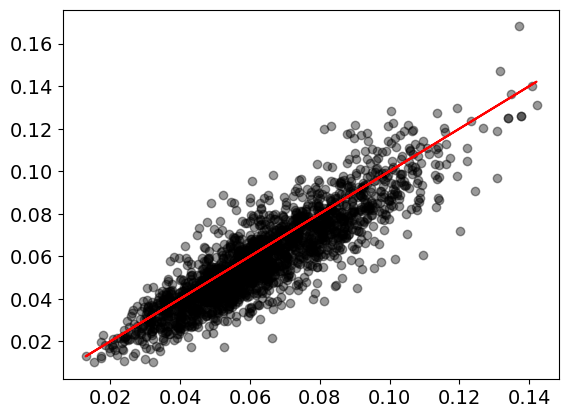

In [18]:
plt.scatter( merged.I0_0_exp -  merged.i0_t_theo_dst,merged.I0_0_exp - merged.i0_t_exp_dst,c='k',alpha=0.4)
plt.plot(merged.I0_0_exp - merged.i0_t_theo_dst,merged.I0_0_exp - merged.i0_t_theo_dst,c='r')

In [19]:
# merged